In [45]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import time

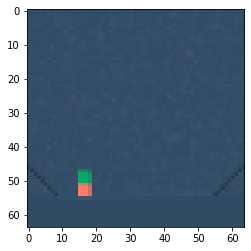

In [73]:
from vqvae.envs.stacker import RefTwoBlocksEnv

env = RefTwoBlocksEnv()

obs = env.reset()

kwargs = dict(width=64,height=64,camera_id=0)

box1_pos = env.data.geom_xpos["box1"].copy()
env.set_block_pos(box0=[box1_pos[0],None,env.box_size*3])
#env.set_block_pos(box0=[-.52,None,env.box_size+.88])
img = env.render(**kwargs)
plt.imshow(img)

In [72]:
box1_pos = env.data.geom_xpos["box1"].copy()
box0_pos = env.data.geom_xpos["box0"].copy()
np.linalg.norm(box0_pos-box1_pos)


0.06600000000000006

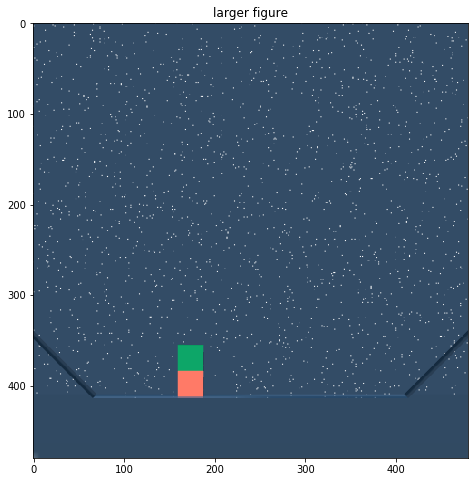

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dm_control import suite
#env = suite.load('stacker','stack_2_blocks')

#obs = env.reset()

#kwargs = dict(width=128,height=128,camera_id=0)
#img = env.physics.render(**kwargs)

fig2 = plt.figure(figsize = (8,8)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(img, interpolation='none')
ax3.set_title('larger figure')

plt.show()

In [4]:
np.linalg.norm(obs_dict['achieved_goal']-obs_dict['desired_goal'])

0.2323025

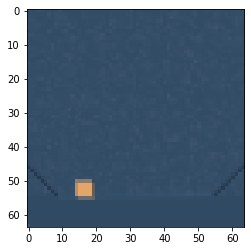

In [5]:
kwargs = dict(width=64,height=64,camera_id=0)
plt.imshow(env.block_env.render(**kwargs))

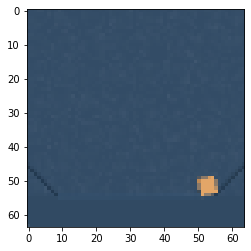

In [3]:
from vqvae.envs.utils import RefBlockEnv

env = RefBlockEnv()
env.dm_env.reset()
env.set_block_pos(x=.5,z=.2)
render_kwargs = dict(width=64,height=64,camera_id=0)
img0 = env.render(**render_kwargs)
imgs = []
for _ in range(100):
    a = np.random.uniform(-1,1,env.dm_env.action_spec().shape)
    env.dm_env.step(a)
    img = env.render(**render_kwargs)
    imgs.append(img)
    
plt.imshow(img)

0.010987520217895508


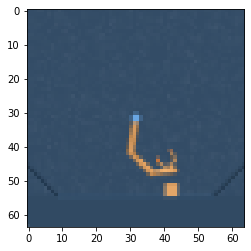

In [4]:
from dm_control import suite
env = suite.load('stacker','push_1')
qpos = env.physics.named.data.qpos
physics = env.physics 
render_kwargs = dict(width=64,height=64,camera_id=0)

img0 = env.physics.render(**render_kwargs)
s = time.time()
env.reset()
print(time.time()-s)
imgs = []
for _ in range(100):
    a = np.random.uniform(-1,1,env.action_spec().shape)
    env.step(a)
    img = env.physics.render(**render_kwargs)
    imgs.append(img)

plt.imshow(img)

In [5]:
data = np.load('/home/misha/research/vqvae/data/single_block_length100_paths_10.npy',allow_pickle=True)

imgs = data.item().get("image_observation")

In [6]:
len(imgs)

1000

-0.05843697896201359
-0.0563042299962047
-0.05411265729999314
-0.05247600587663904
-0.05139316560432193
-0.05067247717058309
-0.050256471714674275
-0.050140620719279674
-0.05032716001266068
-0.05081941302645129
-0.05162130489521562
-0.052737239456731755
-0.053206018514223956
-0.05298057112658556
-0.05287432496673829
-0.05309973780204505
-0.05365754065835163
-0.054166709422966954
-0.053316463980102084
-0.051786137604450125
-0.05056596133947473
-0.04963266834313997
-0.04898454124423632
-0.04862218002694704
-0.0485463917620774
-0.04875860862571633
-0.04926136479805338
-0.05005846779992298
-0.05115483818585699
-0.0525560184876572
-0.05424972826729482
-0.05610937624286001
-0.05786928764260413
-0.05813778513190283
-0.05796947648371189
-0.05785075694707272
-0.05778690225494198
-0.0577542729367792
-0.057737661627434496
-0.05745295745062138
-0.05753344505797846
-0.05759491965820459
-0.05732992647478486
-0.057352547500953914
-0.057358767351437995
-0.05735695385689382
-0.05735491068580788
-0.0573

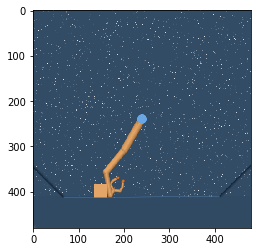

In [8]:
from vqvae.envs.utils import SimpleGoalEnv

env = SimpleGoalEnv(obs_dim=42,goal_dim=3,env_name='stacker',task='push_1')

obs_dict0 = env.reset()
imgs=[]
img0 = env.physics.render(480,480,0)
for _ in range(100):
    a = env.action_space.sample()
    obs_dict,r,d,info = env.step(a)
    distance = np.linalg.norm(
            obs_dict["desired_goal"] - obs_dict["achieved_goal"])
    print(r)
    img = env.physics.render(480,480,0)
    imgs.append(img)
print('achieved_goal',obs_dict0['achieved_goal'])
print('desired_goal',obs_dict0['desired_goal'])
list_to_vid('video',imgs)
plt.imshow(img0)

In [35]:
import skvideo.io
import numpy as np
import cv2
from PIL import Image, ImageDraw, ImageFont
 
def list_to_vid(name,imgs,img_dim=480):
    n = img_dim#imgs[0].shape[0]
  
    imgs = np.array(imgs)
    outputdata = imgs
    outputdata = outputdata.astype(np.uint8)
    outputdict={}
    outputdict["-pix_fmt"]='yuv420p'
    skvideo.io.vwrite(name+".mp4",outputdata, outputdict=outputdict)

def toggle_magnet(env):
    current_pos = env.physics.data.qpos.copy()
    magnet_state = env.physics.named.model.eq_active[0].copy()
    
    with env.physics.reset_context():
        for i in range(len(current_pos)):
            env.physics.data.qpos[i]=current_pos[i]
        env.physics.named.model.eq_active[0]= np.abs(magnet_state-1)
        


In [40]:
from dm_control import suite
import numpy as np
env = suite.load('stacker','stack_2_blocks')

model = env.physics.named.model

act_dim = env.action_spec().shape
imgs = []

kwargs = dict(width=64,height=64,camera_id=0)
#toggle_magnet(env)
ts = env.reset()

for i in range(200):
    a = np.random.uniform(-1,1,act_dim) + [1,.3,0]
    ts = env.step(a)
    #if i == 50:
    #    toggle_magnet(env)
    #if i == 100:
    #    toggle_magnet(env)
        
    img = env.physics.render(**kwargs)
    imgs.append(img)

In [42]:
from vqvae.envs.stacker import StackerGoalEnv
import numpy as np
act_dim = 3
env = StackerGoalEnv(obs_dim=30, goal_dim=3,
                              env_name='stacker',
                              task='stack_2_blocks',
                              max_steps=200,
                              reward_type='pick_and_place_sparse',
                              threshold=0.05)

ts = env.reset()
imgs = []
for i in range(500):
    a = np.random.uniform(-1,1,act_dim) + [1,.3,0]
    
        
    ts = env.step(a)

    hand_pos = env.data.geom_xpos["hand"].copy()
    box_pos = env.data.geom_xpos["box0"].copy()
    distance = np.linalg.norm(hand_pos-box_pos)
    #print(i,distance)
    #if i == 50:
    
    #    toggle_magnet(env)
    #if i == 300:
    #    toggle_magnet(env)
        
    img = env.physics.render(**kwargs)
    imgs.append(img)

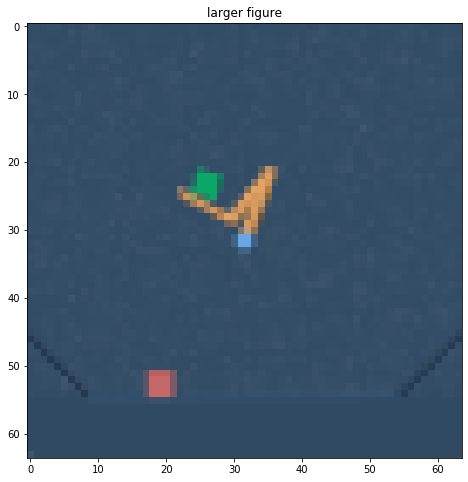

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from dm_control import suite

img = env.physics.render(**kwargs)

fig2 = plt.figure(figsize = (8,8)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(111)
ax3.imshow(img, interpolation='none')
ax3.set_title('larger figure')
import numpy as np

plt.show()

In [44]:
list_to_vid('video',imgs)

In [55]:
np.concatenate([x.reshape(-1) for x in list(dict(ts.observation).values())]).shape

(28,)

In [86]:
from dm_control import suite
from dm_control import viewer

# Load an environment from the Control Suite.
env = suite.load(domain_name="stacker", task_name="stack_2_blocks")

# Launch the viewer application.
viewer.launch(env)

In [57]:
env.physics.named.data.geom_xpos

FieldIndexer(geom_xpos):
                x         y         z         
 0      floor [ 0         0         0       ]
 1      wall1 [-0.683     0         0.283   ]
 2      wall2 [ 0.683     0         0.283   ]
 3 background [ 0         0.2       0.5     ]
 4   arm_root [ 0         0         0.4     ]
 5  upper_arm [ 0.016     0         0.311   ]
 6 middle_arm [ 0.0236    0         0.148   ]
 7  lower_arm [-0.0388    0         0.0478  ]
 8       hand [-0.106     0         0.0152  ]
 9       box0 [ 0.251     0         0.033   ]
10       box1 [ 0.0671    0         0.033   ]

In [123]:
from rlsink.utils.data import load_data_and_data_loaders,load_model

data_file_path = '/home/misha/research/vqvae/data/reacher_no_target_length100_paths_50.npy'
model_filename = '/home/misha/research/vqvae/results/vqvae_data_reacher_aug7_ne128nd2.pth'


model,vqvae_data = load_model(model_filename)

tr_data, v_data, tr_loader, v_loader = load_data_and_data_loaders(data_file_path, 100,shuffle=False,include_state=True)

Loading data
Done loading data
Loading data
Done loading data


In [67]:
from torchvision.utils import make_grid
import torch 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def display_image_grid(x,nrow=8):
    x = make_grid(x.cpu().detach()+0.5,nrow=nrow)
    x = x.numpy()
    fig = plt.imshow(np.transpose(x, (1,2,0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    
def reconstruct(data_loader,model):
    out = next(iter(data_loader))
    x = out[0]
    x = x.to(device)
    vq_encoder_output = model.pre_quantization_conv(model.encoder(x))
    _, z_q, _, _,e_indices = model.vector_quantization(vq_encoder_output)
    x_recon = model.decoder(z_q)

    return x,x_recon, z_q,e_indices



def normalize_tensor(x):
    x *=.5
    x+=.5
    x*=255.
    return x.int()

def de_normalize_tensor(x):
    x *=.5
    x+=.5
    x*=255.
    return x.int()
    

In [ ]:
x_val,x_val_recon,z_q,e_indices = reconstruct(v_loader,model)
z = model.pre_quantization_conv(model.encoder(x_val))
x_val = normalize_tensor(x_val)
print(x_val.type(),x_val_recon.shape,z_q.shape,e_indices.shape)
display_image_grid(x_val[:16],nrow=4)

In [146]:
def vqvae_encoder_for_cpc(x,model,batch_size,cpc_batch_size):
    x = x.to(device)
    z = model.pre_quantization_conv(model.encoder(x))
    return z.reshape(batch_size,cpc_batch_size,-1)
    

z = vqvae_encoder(x,model)
z=z.reshape(batch_size,cpc_batch_size,-1).detach().cpu().numpy()


In [149]:
for j in range(n_neg+2):
    d = np.linalg.norm(z[0][0]-z[0][j])
    #print(d)

In [4]:
from rlsink.utils.data import load_data_and_data_loaders,load_model

data_file_path = '/home/misha/research/vqvae/data/reacher_no_target_length100_paths_50.npy'
model_filename = '/home/misha/research/vqvae/results/vqvae_data_reacher_aug7_ne128nd2.pth'


model,vqvae_data = load_model(model_filename)

tr_data, v_data, tr_loader, v_loader = load_data_and_data_loaders(data_file_path, 100,shuffle=False,include_state=True)

Loading data
Done loading data
Loading data
Done loading data


In [430]:
counts = []
all_scores = []

for _ in range(100):
    x = next(iter(loader))[0]
    #print(x.shape)
    z = vqvae_encoder_for_cpc(x,model)
    #z = z.reshape(cpc_batch_size,batch_size,-1)
    z = z.reshape(cpc_batch_size,-1)

    #print(z.shape)

    z_t = z[0]
    z_others = z[1:]
    scores = torch.log(cpc_model.naive_forward(z_t,z_others))
    all_scores.append(scores.detach().cpu().numpy().reshape(-1))
    m = torch.argsort(scores.view(-1),descending=True)[:1]
    counts.append(0 in m)
print(sum(counts)/len(counts))


0.8


In [435]:
print(np.array(all_scores).mean(),np.array(all_scores).std())

9.3204 13.811082


In [451]:
import torch.nn.functional as F
scores = scores.reshape(-1)
s = (scores - np.array(all_scores).mean())/np.array(all_scores).std()
print(torch.exp(-2* s))
#s = F.sigmoid(scores)
s = torch.exp(-s)
s = s.detach().cpu().numpy()

tensor([ 0.0329, 13.5050,  0.4719,  1.7282,  1.2085,  0.8917,  5.5872,  1.4531,
         3.9196,  0.8208,  3.0944,  0.0540,  1.2199,  3.0946,  5.4679,  0.8068,
         1.0180,  6.2445,  1.5293,  1.4148,  4.2892,  3.1021,  5.0522,  0.1890,
         1.9654,  0.1071,  6.2925,  3.9870,  1.4531,  1.8918,  5.2825,  3.1206,
         3.3465,  0.0368,  8.6638,  2.1719,  2.5502,  0.6680,  2.3315,  1.8378,
         1.3645,  2.0469,  0.2064, 12.0578,  0.9071,  1.8841,  5.9628,  0.0314,
         0.1205,  0.1489,  6.7367], device='cuda:0', grad_fn=<ExpBackward>)


In [447]:
indices = torch.tensor(np.argwhere(s<.2)+1).view(-1)
indices = torch.cat((torch.tensor([0]),indices))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


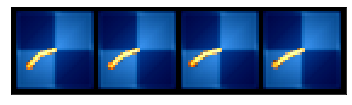

In [448]:
y =  torch.index_select(x, 0, indices)
display_image_grid(y[:16],nrow=4)

In [428]:
print(scores.mean(),scores.std())

tensor(5.8503, device='cuda:0', grad_fn=<MeanBackward0>) tensor(15.0535, device='cuda:0', grad_fn=<StdBackward0>)


In [24]:
from rlsink.utils.data import load_data_and_data_loaders,load_model

data_file_path = '/home/misha/research/vqvae/data/reacher_no_target_length100_paths_2000.npy'
model_filename = '/home/misha/research/vqvae/results/vqvae_data_reacher_aug7_ne128nd2.pth'


model,vqvae_data = load_model(model_filename)

tr_data, v_data, tr_loader, v_loader = load_data_and_data_loaders(data_file_path, 100,shuffle=False,include_state=True)

Loading data
Done loading data
Loading data
Done loading data


In [28]:
import pickle
device = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")


obj = pickle.load(open("/home/misha/research/rlsink/saved/reacher_graph.pkl", "rb"))
G, nodes = obj['graph'], obj['nodes']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


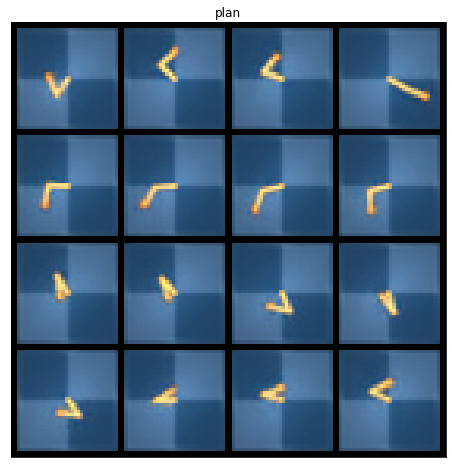

In [29]:
"""
Visualize nodes
"""
from torchvision.utils import make_grid
import torch 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def normalize_tensor(x):
    x *=.5
    x+=.5
    x*=255.
    return x.int()

def display_image_grid(x,nrow=8):
    x = normalize_tensor(x).int()
    x = make_grid(x.cpu().detach(),nrow=nrow)
    x = x.numpy()
    

    fig2 = plt.figure(figsize = (16,8)) # create a 5 x 5 figure 
    ax3 = fig2.add_subplot(111)
    ax3.imshow(np.transpose(x, (1,2,0)), interpolation='none')
    ax3.set_title('plan')
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)

    plt.show()
def decode_nodes(nodes,model):
    nodes = torch.tensor(nodes).float()
    nodes = nodes.to(device)
    _, z_q, _, _,e_indices = model.vector_quantization(nodes)
    x = model.decoder(z_q)

    return x
x = decode_nodes(nodes,model)
display_image_grid(x[:16],nrow=4)

In [139]:
import networkx as nx

n = len(G)
while True:
    a = np.random.randint(n)
    b = np.random.randint(n)
    path_ids = nx.dijkstra_path(G,a,b)
    path_nodes = nodes[path_ids,:]
    if len(path_ids)<50 and len(path_ids) > 5:
        break
print(len(path_ids))
print(path_ids)
node_ds = np.array([np.linalg.norm(path_nodes[i]-path_nodes[i+1]) for i in range(len(path_ids)-1)])
ids = np.argwhere(node_ds>.15).reshape(-1)
path_ids = list(np.array(path_ids)[ids+1])
print(len(path_ids))

print(path_ids)
path_nodes = nodes[path_ids]
print(path_ids)
node_ds = np.array([np.linalg.norm(path_nodes[i]-path_nodes[i+1]) for i in range(len(path_ids)-1)])

print(node_ds)


45
[267, 507, 74, 300, 576, 722, 76, 677, 18, 594, 376, 366, 587, 482, 614, 421, 609, 440, 197, 126, 673, 26, 661, 25, 432, 691, 560, 626, 21, 461, 547, 278, 611, 388, 467, 668, 305, 604, 516, 400, 183, 309, 553, 308, 551]
27
[74, 300, 576, 722, 677, 594, 376, 587, 482, 614, 421, 197, 26, 25, 560, 278, 611, 388, 467, 668, 305, 604, 400, 183, 553, 308, 551]
[74, 300, 576, 722, 677, 594, 376, 587, 482, 614, 421, 197, 26, 25, 560, 278, 611, 388, 467, 668, 305, 604, 400, 183, 553, 308, 551]
[0.18363254 0.18257616 0.17276864 0.25825635 0.26253805 0.16996576
 0.1214994  0.17601773 0.17715213 0.15172043 0.30881593 0.3322736
 0.24509381 0.26807693 0.49060732 0.17102307 0.19783081 0.16352595
 0.1666896  0.18723902 0.159724   0.28946933 0.19908324 0.26291496
 0.19809301 0.17453678]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


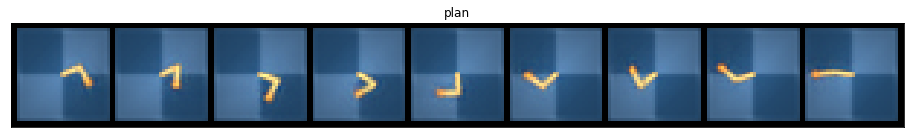

In [140]:
import warnings
warnings.filterwarnings('ignore')


    
x = decode_nodes(path_nodes[::3],model)
display_image_grid(x[:],nrow=len(path_ids))

In [143]:
""" cpc distances """
import math

z = path_nodes.view(-1,128)
cpc_model.forward(z[:1,:],z[:,:])

def t_distance_chain(z):
    d = []
    for i in range(z.shape[0]-1):
        x = np.log(cpc_model.forward(z[i:i+1,:],z[i+1:i+2,:]).item())
        score = np.exp(-x)
        mag = math.floor(math.log10(score))
        d.append(score)
    return d

t = t_distance_chain(z)
t-=np.mean(t)
t/=np.std(t)
t

array([ 2.12547226,  3.22556035, -0.38654433, -0.37932747,  0.0402511 ,
       -0.37043752, -0.38809008, -0.38813779, -0.38801893, -0.38811259,
       -0.37980672, -0.38814622, -0.38813902, -0.38812903, -0.38210812,
       -0.38814762, -0.38813828])

In [144]:
cpc_model.forward(z[:1,:],z[6:7,:])


tensor([37419.9648], device='cuda:0', grad_fn=<ExpBackward>)

In [145]:
def markov_chain_distances(nodes):

    distances = []
    for i,n in enumerate(nodes):
        if i>0:
            distance = L2(n,nodes[i-1])
            distances.append(distance)
    return distances

markov_chain_distances(path_nodes.detach().cpu().numpy())
        

[0.2537113,
 0.4572427,
 0.11831409,
 0.45342305,
 0.2746335,
 0.3732487,
 0.18240191,
 0.09891097,
 0.49344808,
 0.3253628,
 0.42398795,
 0.10443172,
 0.16688372,
 0.33259037,
 0.6197928,
 0.13160235,
 0.46602324]

In [151]:
import rlsink.classifiers.cpc as cpc
import torch
n_updates = 100000
lr = 3e0
n = 100
path_length = 100
T = 10
n_neg = 8
batch_size = 12
cpc_batch_size = n_neg+2
cpc_model_path = '/home/misha/research/rlsink/saved/cpc_weights4.pth'
total_samples = cpc_batch_size
gpu_id = 0

device = torch.device(
    "cuda:"+str(gpu_id)) if torch.cuda.is_available() else torch.device("cpu")


sampler = CPCSampler(tr_data, path_length=n, proximity_threshold=T,
                     n_negative=n_neg, batch_size=1)

loader = torch.utils.data.DataLoader(
    tr_data, sampler=sampler, batch_size=total_samples)


xx = torch.cat([next(iter(loader))[0] for _ in range(batch_size)])
#x = next(iter(loader))[0]

In [152]:
xx.shape

torch.Size([120, 3, 32, 32])

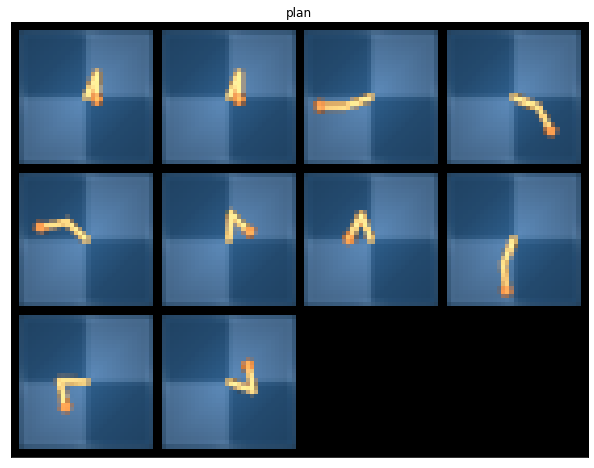

In [153]:
"""
Visualize nodes
"""
from torchvision.utils import make_grid
import torch 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = xx.clone()

def normalize_tensor(x):
    x *=.5
    x+=.5
    x*=255.
    return x.int()

def display_image_grid(x,nrow=8):
    x = normalize_tensor(x).int()
    x = make_grid(x.cpu().detach(),nrow=nrow)
    x = x.numpy()
    

    fig2 = plt.figure(figsize = (16,8)) # create a 5 x 5 figure 
    ax3 = fig2.add_subplot(111)
    ax3.imshow(np.transpose(x, (1,2,0)), interpolation='none')
    ax3.set_title('plan')
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)

    plt.show()
def decode_nodes(nodes,model):
    nodes = torch.tensor(nodes).float()
    nodes = nodes.to(device)
    _, z_q, _, _,e_indices = model.vector_quantization(nodes)
    x = model.decoder(z_q)

    return x
i = 10
display_image_grid(x[i*cpc_batch_size:(i+1)*cpc_batch_size],nrow=4)

In [154]:
cpc_batch

16

In [47]:
x = torch.tensor([1,1,1,2,2,2,3,3,3,4,4,4,5,5,5])
x.view(5,3)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5]])

In [1]:
import numpy as np
x = np.arange(10)
x[[1,2,3]]

array([1, 2, 3])

In [141]:
x = [1,2,3,4]
x = np.array([379, 379, 379, 379, 379, 298, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 379, 379, 379, 379, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 706, 706, 706, 706, 706, 706, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 394, 394, 394, 394, 394, 394, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 302, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 420, 420, 609, 609, 609, 609, 609, 609, 609, 609, 609, 609, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 394, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 420, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 194, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 502, 502, 502, 502, 502, 502, 502, 502, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 423, 706, 706, 706, 706, 676, 676, 676, 676, 676, 676, 706, 706, 706, 706, 706, 706, 706, 706, 706, 706, 706, 706, 706, 706, 297, 297, 297, 297, 297, 297, 297, 706, 706, 706, 566, 566, 566, 566, 566, 706, 297, 297, 297, 297, 297, 297, 298, 298, 298, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 379, 77, 77, 77, 77, 77, 77, 77, 77, 77, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429, 429])
x

array([379, 379, 379, 379, 379, 298, 297, 297, 297, 297, 297, 297, 297,
       297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297,
       379, 379, 379, 379, 297, 297, 297, 297, 297, 297, 297, 297, 297,
       297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297,
       297, 297, 706, 706, 706, 706, 706, 706, 423, 423, 423, 423, 423,
       423, 423, 423, 423, 423, 423, 423, 502, 502, 502, 502, 502, 502,
       502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 502, 531, 531,
       531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531, 531,
       531, 394, 394, 394, 394, 394, 394, 194, 194, 194, 194, 194, 194,
       194, 194, 194, 194, 194, 194, 194, 194, 419, 419, 419, 419, 419,
       419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419,
       419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419,
       419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419,
       419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 419, 41

In [174]:
y = np.array([0]+[1 if (x[i]-x[i+1]) != 0 else 0 for i in range(len(x)-1)])
x[ids]

array([298, 297, 379, 297, 706, 423, 502, 531, 394, 194, 419, 194, 302,
        12, 420, 609, 420, 194, 394, 420, 194, 419, 502, 423, 706, 676,
       706, 297, 706, 566, 706, 297, 298, 379,  77, 429])

In [168]:
ids = np.argwhere(y>0).squeeze()
ids

array([  5,   6,  26,  30,  54,  60,  72,  89, 105, 111, 125, 197, 236,
       251, 272, 274, 284, 303, 321, 340, 352, 364, 375, 383, 397, 401,
       407, 421, 428, 431, 436, 437, 443, 446, 458, 467])

In [200]:
#[524 524 524 493 493 493 493]
mask =np.array([0, 1, 0, 1, 0, 0, 0])
#mask = np.array([])
np.argwhere(mask > 0)

array([[1],
       [3]])

In [201]:
[v[0] for v in np.argwhere(mask > 0)]

[1, 3]